# **<h3 align="center">Machine Learning 2025-26</h3>**
## **<h3 align="center">Cars 4 You: Expediting Car Evaluations with ML</h3>**


**Group 45 members:**<br>

**Table of Contents** <br>
* [1. Imports](#imports)
    * [1.1. Import Libraries](#import_libraries)
    * [1.2. Import Dataset](#import_dataset)
* [2. Exploration](#exploration)
  * [2.1. Description of the Dataset's Structure](#dataset_structure)
  * [2.2. Exploration of the Dataset](#dataset_exploration)
* [3. Preprocessing](#preprocessing)

<div class="alert alert-block alert-success"> <a id = "imports"></a>

# 1. Imports

## 1.1. Import the Libraries <a class="anchor" id="import_libraries"></a>


In [1]:
# General Libraries
import pandas as pd
import numpy as np
import re
from math import ceil
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import spearmanr

# Machine Learning and Data Preprocessing
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, LabelEncoder
from imblearn.over_sampling import SMOTE

## 1.2. Import the DataSet <a class="anchor" id="import_dataset"></a>

In [2]:
df = pd.read_csv('../data/train.csv', sep=',')

In [3]:
df.columns

Index(['carID', 'Brand', 'model', 'year', 'price', 'transmission', 'mileage',
       'fuelType', 'tax', 'mpg', 'engineSize', 'paintQuality%',
       'previousOwners', 'hasDamage'],
      dtype='object')

In [4]:
#importing the test dataset
df_test = pd.read_csv('../data/test.csv', sep=',')

In [5]:
df_test.columns

Index(['carID', 'Brand', 'model', 'year', 'transmission', 'mileage',
       'fuelType', 'tax', 'mpg', 'engineSize', 'paintQuality%',
       'previousOwners', 'hasDamage'],
      dtype='object')

In [6]:
#importing the sample submission dataset
df_sample_submission = pd.read_csv('../data/sample_submission.csv', sep=',')

In [7]:
df_sample_submission.columns

Index(['carID', 'price'], dtype='object')

In [8]:
df[["carID", "price", "Brand", "model", "fuelType"]].head()

,carID,price,Brand,model,fuelType
0,69512,22290,VW,Golf,Petrol
1,53000,13790,Toyota,Yaris,Petrol
2,6366,24990,Audi,Q2,Petrol
3,29021,12500,Ford,FIESTA,Petrol
4,10062,22995,BMW,2 Series,Petrol


<div class="alert alert-block alert-success"> <a id = "exploration"></a>

# 2. Exploration

## 2.1. Description of the Dataset's Structure <a class="anchor" id="dataset_structure"></a>

- *carID* - An attribute that contains an identifier for each car.

- *Brand* - The car’s main brand (e.g. Ford, Toyota)
    
- *model* - The car model

- *year* - The year of Registration of the Car
    
- *mileage* - The total reported distance travelled by the car (in
miles)

- *tax* - The amount of road tax (in £) that, in 2020, was
applicable to the car in question.

- *fuelType* - Type of Fuel used by the car (Diesel, Petrol, Hybrid,
Electric)
    
- *mpg* - Average Miles per Gallon
    
- *engineSize* - Size of Engine in liters (Cubic Decimeters)
    
- *paintQuality%* - The mechanic’s assessment of the cars’ overall paint
quality and hull integrity (filled by the mechanic
during evaluation).
    
- *previousOwners* - Number of previous registered owners of the vehicle.

- *hasDamage* - Boolean marker filled by the seller at the time of
registration stating whether the car is damaged or not.

- *price* - The car’s price when purchased by Cars 4 You (in £).

## 2.2. Exploration of the Dataset <a class="anchor" id="dataset_exploration"></a>

In [9]:
df.shape

(75973, 14)

In [10]:
df.head().T

,0,1,2,3,4
carID,69512,53000,6366,29021,10062
Brand,VW,Toyota,Audi,Ford,BMW
model,Golf,Yaris,Q2,FIESTA,2 Series
year,2016.0,2019.0,2019.0,2018.0,2019.0
price,22290,13790,24990,12500,22995
transmission,Semi-Auto,Manual,Semi-Auto,anual,Manual
mileage,28421.0,4589.0,3624.0,9102.0,1000.0
fuelType,Petrol,Petrol,Petrol,Petrol,Petrol
tax,NaN,145.0,145.0,145.0,145.0
mpg,11.417268,47.9,40.9,65.7,42.8


In [11]:
df.tail().T

,75968,75969,75970,75971,75972
carID,37194,6265,54886,860,15795
Brand,Mercedes,Audi,Toyota,Audi,Ford
model,C Class,Q3,Aygo,Q3,Fiesta
year,2015.0,2013.0,2017.0,2015.0,2018.0
price,13498,12495,8399,12990,10495
transmission,Manual,Semi-Auto,Automatic,Manual,Manual
mileage,14480.0,52134.0,11304.0,69072.0,16709.0
fuelType,etrol,Diesel,Petrol,iesel,Petro
tax,125.0,200.0,145.0,125.0,145.0
mpg,53.3,47.9,67.0,60.1,64.2


In [12]:
#checking the data types of the variables of the training dataset and if there are any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74456 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    74451 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        74462 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


In [13]:
df.isna().sum().sort_values(ascending=False)

mpg               7926
tax               7904
previousOwners    1550
hasDamage         1548
paintQuality%     1524
transmission      1522
Brand             1521
model             1517
engineSize        1516
fuelType          1511
year              1491
mileage           1463
carID                0
price                0
dtype: int64

In [14]:
(df.isna().mean() * 100).sort_values(ascending=False)

mpg               10.432654
tax               10.403696
previousOwners     2.040198
hasDamage          2.037566
paintQuality%      2.005976
transmission       2.003343
Brand              2.002027
model              1.996762
engineSize         1.995446
fuelType           1.988864
year               1.962539
mileage            1.925684
carID              0.000000
price              0.000000
dtype: float64

- ~10% missing in mpg and tax → will need imputation  
- ~2% missing in other columns → minor, can be handled easily  

In [15]:
df.duplicated().sum()

0

In [16]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carID,75973.0,NaN,NaN,NaN,37986.0,21931.660338,0.0,18993.0,37986.0,56979.0,75972.0
Brand,74452,72,Ford,14808,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,74456,735,Focus,6353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,74482.0,NaN,NaN,NaN,2017.096611,2.208704,1970.0,2016.0,2017.0,2019.0,2024.121759
price,75973.0,NaN,NaN,NaN,16881.889553,9736.926322,450.0,10200.0,14699.0,20950.0,159999.0
transmission,74451,40,Manual,38050,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage,74510.0,NaN,NaN,NaN,23004.184088,22129.788366,-58540.574478,7423.25,17300.0,32427.5,323000.0
fuelType,74462,34,Petrol,37995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tax,68069.0,NaN,NaN,NaN,120.329078,65.521176,-91.12163,125.0,145.0,145.0,580.0
mpg,68047.0,NaN,NaN,NaN,55.152666,16.497837,-43.421768,46.3,54.3,62.8,470.8


- Negative or unrealistic values found (mileage, mpg, tax, engineSize, previousOwners)  
- paintQuality% above 100 → clip to [0,100]  
- year has decimals / future dates → fix later
- fuelType and transmission have too many categories → need cleaning (typos, casing)  
- hasDamage should be boolean  
- previousOwners and year should be integers
- carID is just an identifier → drop from training  



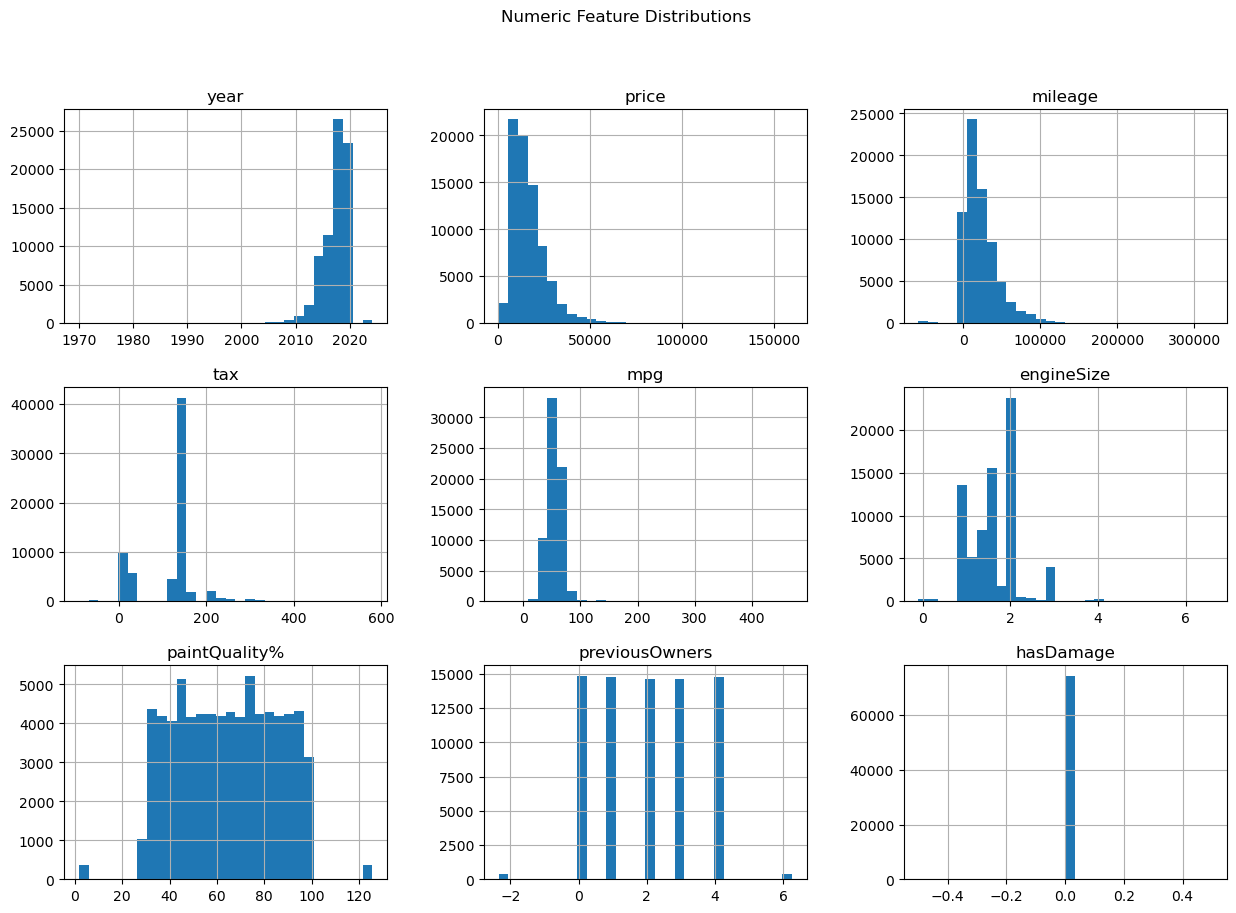

In [17]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('carID')
df[num_cols].hist(figsize=(15,10), bins=30)
plt.suptitle("Numeric Feature Distributions")
plt.show()


<div class="alert alert-block alert-success"> <a id = "preprocessing"></a>

# 3. Preprocessing